Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os

Defining all the functions

In [2]:
def load_stock_data(symbol):
    file_path = f'data/{symbol}_stockdata.xlsx'
    if os.path.exists(file_path):
        # Load the data
        df = pd.read_excel(file_path, engine='openpyxl', index_col='Date', parse_dates=True)
        return df['Close']
    else:
        print(f"File for {symbol} not found in the 'data' folder. Search for NIFTY50 symbols.")
        return None

In [3]:
def visualize_data(data, title='Time Series Data'):
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

In [4]:
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("Data is stationary.")
        return True
    else:
        print("Data is not stationary.")
        return False

In [5]:
def make_data_stationary(data):
    return data.diff().dropna()

In [6]:
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

In [7]:
def make_predictions(fitted_model, steps=30):
    forecast = fitted_model.forecast(steps=steps)
    forecast.index = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=steps)
    return forecast

In [8]:
def plot_predictions(data, forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(data[-1000:], label='Actual')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title('ARIMA Model Prediction')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

In [9]:
def plot_residuals(fitted_model, data):
    residuals = data - fitted_model.fittedvalues
    plt.figure(figsize=(12, 6))
    plt.plot(residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals of ARIMA Model')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

In [10]:
def plot_residual_distribution(fitted_model, data):
    residuals = data - fitted_model.fittedvalues
    residuals.plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6))
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.show()

In [11]:
def plot_qq_residuals(fitted_model, data):
    residuals = data - fitted_model.fittedvalues
    stats.probplot(residuals.dropna(), dist="norm", plot=plt)
    plt.title('QQ Plot of Residuals')
    plt.show()

In [12]:
def plot_rolling_residual_stats(fitted_model, data):
    residuals = data - fitted_model.fittedvalues
    plt.figure(figsize=(12, 6))
    residuals.rolling(window=30).mean().plot(label='Rolling Mean', color='blue')
    residuals.rolling(window=30).std().plot(label='Rolling Std', color='orange')
    plt.title('Rolling Mean and Standard Deviation of Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

In [13]:
def evaluate_model(test_data, forecast):
    mae = mean_absolute_error(test_data, forecast[:len(test_data)])
    rmse = np.sqrt(mean_squared_error(test_data, forecast[:len(test_data)]))
    print('Mean Absolute Error (MAE):', mae)
    print('Root Mean Squared Error (RMSE):', rmse)

Main execution

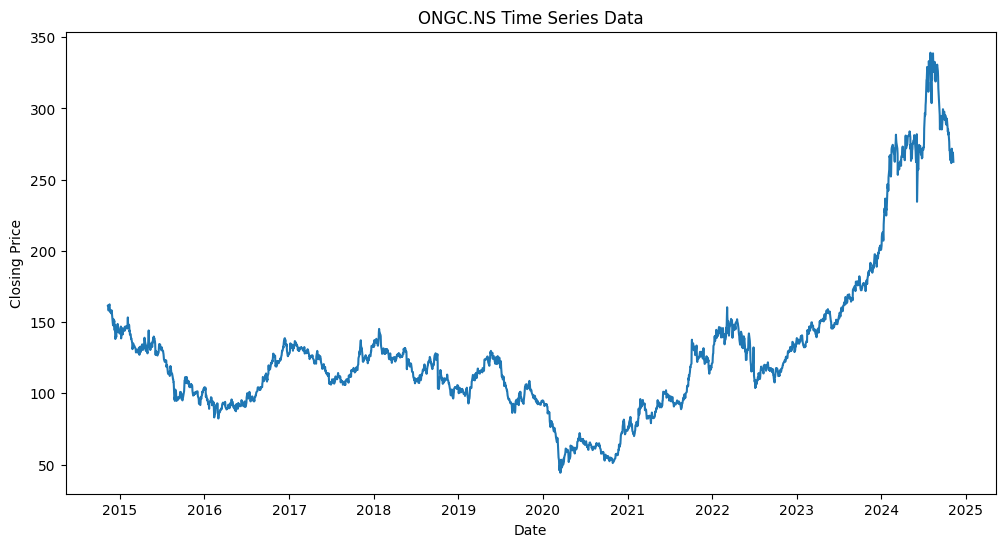

In [14]:
symbol_input = input("Enter the ticker symbol of the company (e.g., 'ASIANPAINT.NS'): ").upper()
symbol = symbol_input + ".NS"
data = load_stock_data(symbol)
visualize_data(data, title=f'{symbol} Time Series Data')

ADF Statistic: -3.1428393679162103
p-value: 0.023541080118356008
Data is stationary.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2470
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6133.382
Date:                Sun, 10 Nov 2024   AIC                          12272.763
Time:                        15:01:22   BIC                          12290.198
Sample:                             0   HQIC                         12279.097
                               - 2470                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4873      0.087      5.626      0.000       0.318       0.657
ma.L1         -0.5578      0.085     -6.547   

c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

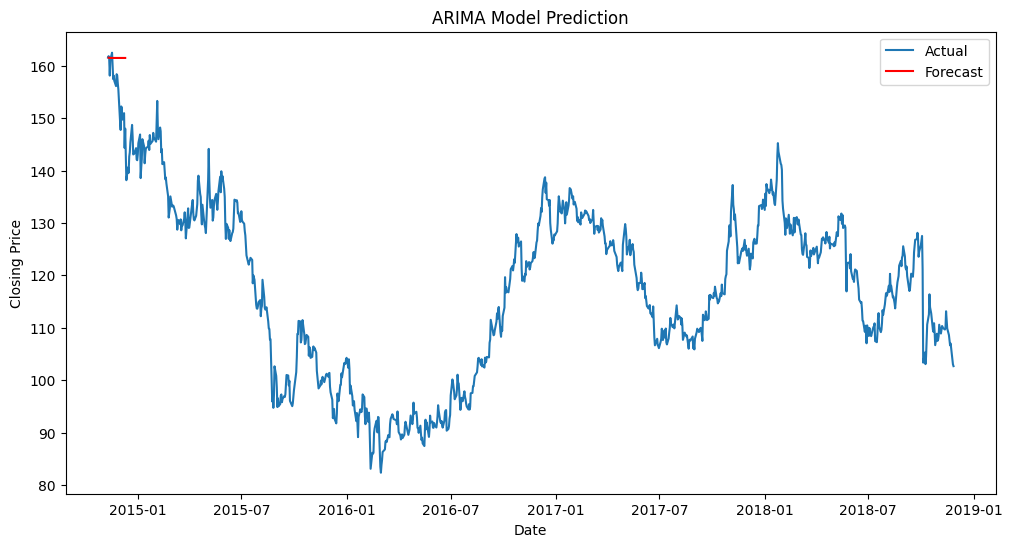

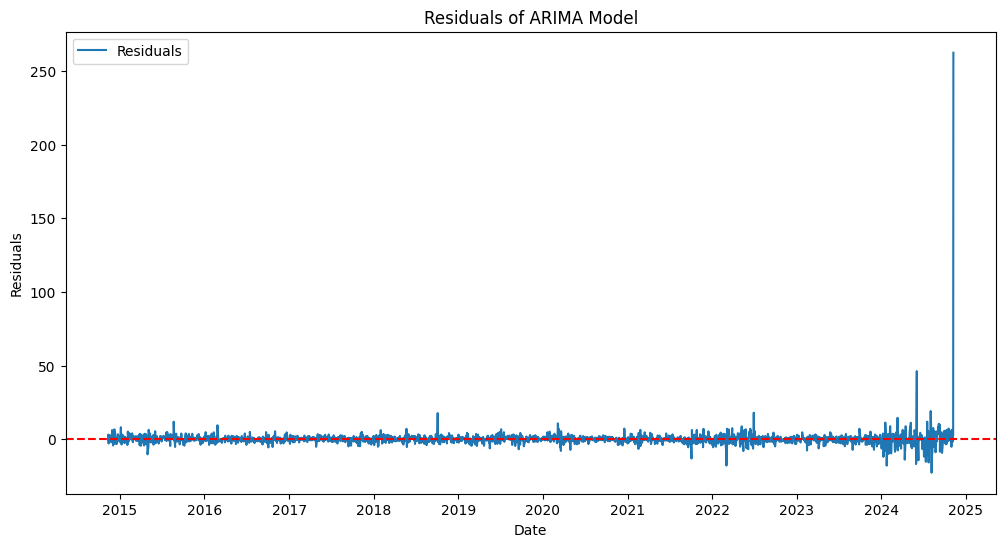

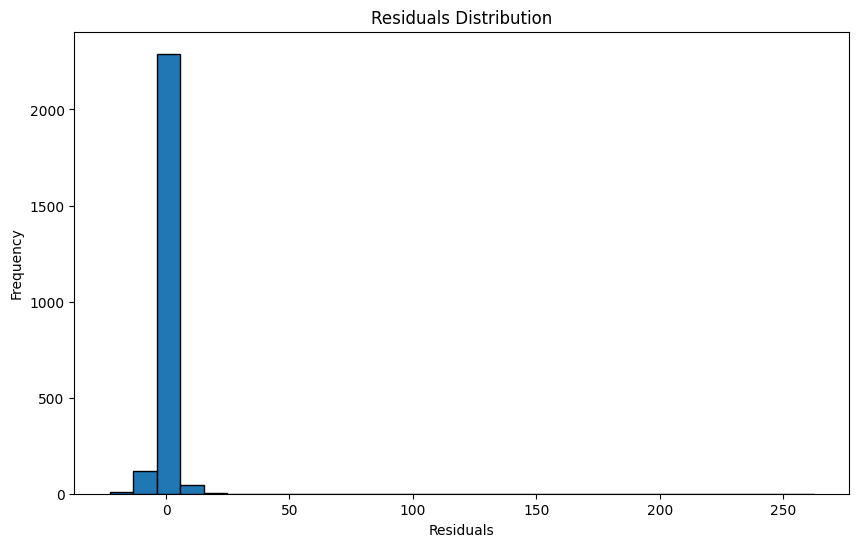

NameError: name 'stats' is not defined

In [15]:
if data is not None:
    stationary_flag = check_stationarity(data)
    if not stationary_flag:
        data = make_data_stationary(data)
    
    fitted_model = fit_arima_model(data)
    forecast = make_predictions(fitted_model, steps=30)
    plot_predictions(data, forecast)
    plot_residuals(fitted_model, data)
    plot_residual_distribution(fitted_model, data)
    plot_qq_residuals(fitted_model, data)
    plot_rolling_residual_stats(fitted_model, data)
    evaluate_model(data[-len(forecast):], forecast)
else:
    print("Unable to proceed with the ARIMA analysis due to missing data.")